In [33]:
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import seaborn as sns

# Queda Livre e Lançamento de Projétil
#### Sem força de arrasto/resistência do ar:

In [29]:
class Movimento: 
    def __init__(self, x0, y0, v0, θ0, g = 9.807, dt = 0.05): # Construtor do Movimento - Inicializa os atributos
        self.x0 = x0 # Posição inicial em x
        self.y0 = y0 # Posição inicial em y
        self.x = None # Vetor da posição em x vs tempo iniciado com valor null
        self.y = None # Vetor da posição em x vs tempo iniciado com valor null
        self.θ0 = θ0 # Ângulo de lançamento
        self.dt = dt # Passo
        self.v0 = v0 # Velocidade inicial
        self.v0x = v0 * np.cos(θ0) # Componente horizontal da velocidade - Constante
        self.v0y = v0 * np.sin(θ0) # Componente vertical da velocidade
        self.g = g # Gravidade
        self.t = None # Tempo do movimento iniciado com valor null
        self.ymax = None # Altura máxima iniciada com valor null
        self.xymax = None # Valor de x na altura máxima iniciado com valor null

    def TempoMovimento(self): # Altera o vetor de tempo
        tmax = (self.v0y * 2) / self.g
        self.t = np.arange(0, tmax, self.dt)
        self.qtd_tempo = len(self.t) # Tamanho do vetor de tempo

    def PosicaoXTempo(self):
        self.x = np.zeros(self.qtd_tempo) # Preenchendo com zeros
        self.y = np.zeros(self.qtd_tempo) # Preenchendo com zeros
        i = 0
        while(i < len(self.t)):
            if(self.x[i] >= 0 and self.y[i] >= 0):
                self.x[i] = self.x0 + self.v0x * self.t[i]
                self.y[i] = self.y0 + (self.v0y * self.t[i]) - (self.g * self.t[i]**2) / 2
                i += 1
        self.ymax = max(self.y) # Atribuindo o valor da altura máxima
        aux_x = None
        for i in range(0, len(self.y)):
            if(self.y[i] == self.ymax):
                aux_x = i
        self.xymax = self.x[aux_x]


    def Visualizar(self):
        sns.set_theme()

        # Impressão do gráfico y(t):
        plt.plot(self.t, self.y, 'crimson')
        plt.title('Gráfico de y(t):', fontsize = 'x-large')
        plt.xlabel('Tempo - t[s]', fontsize = 'x-large')
        plt.ylabel('Posição - y[m]', fontsize = 'x-large')
        plt.show()

        # Impressão do gráfico x(t):
        plt.plot(self.t, self.x, 'green')
        plt.title('Gráfico de x(t):', fontsize = 'x-large')
        plt.xlabel('Tempo - t[s]', fontsize = 'x-large')
        plt.ylabel('Posição - x[m]', fontsize = 'x-large')
        plt.show()

        # Impressão do gráfico y(x):
        fig, ax = plt.subplots()
        plt.scatter(self.xymax, self.ymax, color = 'black', s = 50)
        plt.plot(self.x, self.y, 'k--', lw = 2)
        plt.title('Gráfico de y(x):', fontsize = 'x-large')
        str_xy = '({:.2f}m, {:.2f}m)'.format(self.xymax, self.ymax)
        ax.annotate(str_xy, xy = (self.xymax * 1.05, self.ymax), fontsize = 8)
        plt.xlabel('Posição - x[m]', fontsize = 'x-large')
        plt.ylabel('Posição - y[m]', fontsize = 'x-large')
        plt.show()


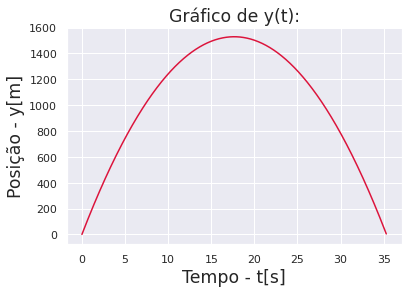

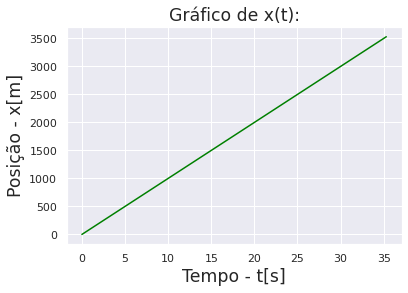

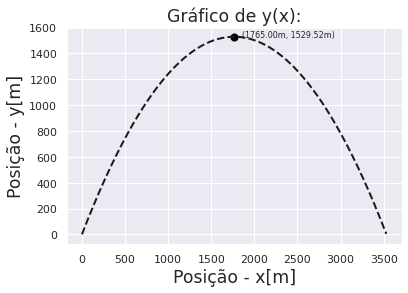

In [30]:
LancamentoTerra = Movimento(0, 0, 200, np.pi / 3, 9.807, ) 
LancamentoTerra.TempoMovimento() # Chamando o método para determinar o tempo de movimento
LancamentoTerra.PosicaoXTempo() # Chamando o método para determinar os valores de y(t), x(t) e ymax
LancamentoTerra.Visualizar()

# Exemplo - Lua

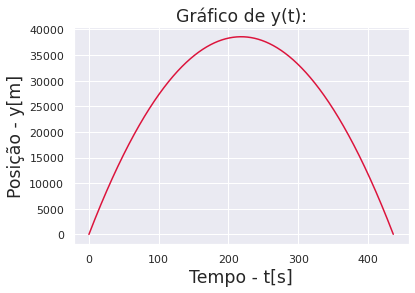

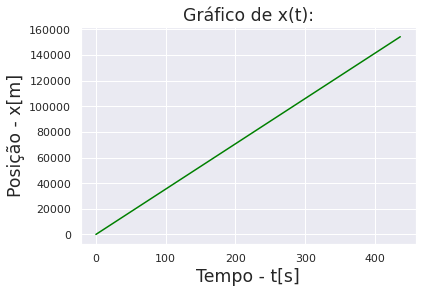

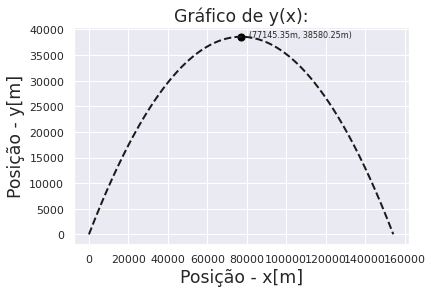

In [31]:
LancamentoLua = Movimento(0, 0, 500, np.pi / 4, 1.62, 0.1) 
LancamentoLua.TempoMovimento() # Chamando o método para determinar o tempo de movimento
LancamentoLua.PosicaoXTempo() # Chamando o método para determinar os valores de y(t), x(t) e ymax
LancamentoLua.Visualizar()

# Exemplo - Saturno

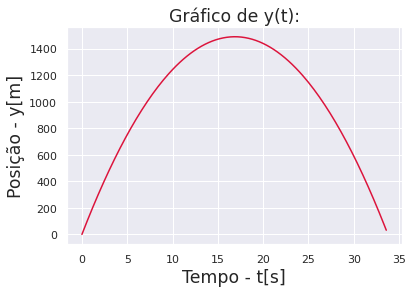

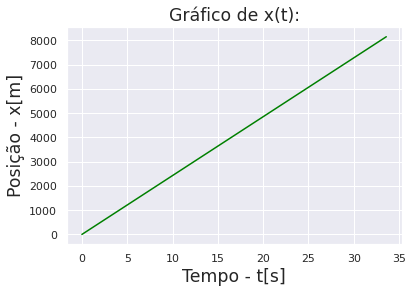

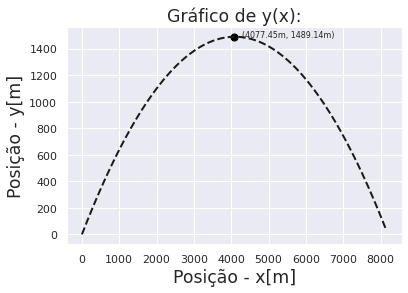

In [32]:
LancamentoSaturno = Movimento(0, 0, 300, np.pi / 5, 10.44, 0.2)
LancamentoSaturno.TempoMovimento()
LancamentoSaturno.PosicaoXTempo()
LancamentoSaturno.Visualizar()